### Fake PII data: Exploratory data analysis

This notebook is used to verify the different fake entities before and after the creation of a synthetic dataset / augmented dataset. First part looks at the generation details and stats, second part evaluates the created synthetic dataset after it has been generated.

In [1]:
%cd ..
!ls

/Users/mattc/Desktop/presidio/presidio-research-fork
CODE_OF_CONDUCT.md              experiment_20220807-075704.json
LICENSE                         experiment_20220807-075836.json
NOTICE                          experiment_20220807-080215.json
README.md                       notebooks
SECURITY.md                     presidio_evaluator
VERSION                         pytest.ini
azure-pipelines.yml             requirements.txt
data                            requirements_all.txt
docs                            setup.cfg
experiment_20220807-073124.json setup.py
experiment_20220807-073416.json tests
experiment_20220807-074044.json venv
experiment_20220807-074747.json


In [2]:
!pip install -q matplotlib wordcloud pandas

You should consider upgrading via the '/Users/mattc/Desktop/presidio/presidio-research-fork/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
from presidio_evaluator import InputSample
from presidio_evaluator.data_generator import PresidioDataGenerator

from collections import Counter

import matplotlib.pyplot as plt

%matplotlib inline

1. Evaluate generation logic and the fake PII bank used during generation

In [4]:
pii_df = pd.read_csv(
    "presidio_evaluator/data_generator/raw_data/FakeNameGenerator.com_3000.csv",
    encoding="utf-8",
)

In [5]:
PresidioDataGenerator.update_fake_name_generator_df(pii_df)
pii_df.head()

,number,gender,nationality,prefix,first_name,middle_initial,last_name,street_name,city,state_abbr,...,age,credit_card_provider,cvv2,credit_card_expire,national_id,job,company,domain_name,person,name
0,1,female,Czech,Mrs.,Marie,J,Hamanová,P.O. Box 255,Kangerlussuaq,QE,...,37,MasterCard,511,Jan-20,NaN,Surveillance officer,Simple Solutions,MarathonDancing.gl,Marie Hamanová,Marie Hamanová
1,2,female,French,Ms.,Patricia,G,Desrosiers,Avenida Noruega 42,Vila Real,VR,...,63,MasterCard,874,Mar-22,NaN,Vascular technologist,Formula Gray,LostMillions.com.pt,Patricia Desrosiers,Patricia Desrosiers
2,3,female,American,Ms.,Debra,O,Neal,1659 Hoog St,Brakpan,GA,...,62,Visa,315,May-20,5.70611E+12,Information architect librarian,Dahlkemper's,MediumTube.co.za,Debra O Neal,Debra O Neal
3,4,male,French,Mr.,Peverell,C,Racine,183 Epimenidou Street,Limassol,LI,...,57,Visa,653,May-23,NaN,Desk clerk,Quickbiz,ImproveLook.com.cy,Peverell Racine,Peverell Racine
4,5,female,Slovenian,Mrs.,Iolanda,S,Tratnik,Karu põik 61,Pärnu,PR,...,57,Visa,893,Apr-24,NaN,Production assistant,Dubrow's Cafeteria,PostTan.com.ee,Iolanda Tratnik,Iolanda Tratnik


In [6]:
for (name, series) in pii_df.iteritems():
    print(name)
    print("Unique values: {}".format(len(series.unique())))
    print(series.value_counts())
    print("\n**************\n")

number
Unique values: 3000
1       1
2004    1
1995    1
1996    1
1997    1
       ..
1003    1
1004    1
1005    1
1006    1
3000    1
Name: number, Length: 3000, dtype: int64

**************

gender
Unique values: 2
male      1603
female    1397
Name: gender, dtype: int64

**************

nationality
Unique values: 24
Russian        156
Danish         143
English        141
Czech          140
German         139
Spanish        133
Swedish        133
Hungarian      132
Chechen        131
French         130
Japanese       128
Italian        128
American       127
Croatian       123
Slovenian      123
Finnish        122
Greenlander    114
Brazil         114
Dutch          113
Norwegian      108
Polish         108
Icelandic      107
Australian     106
Scottish       101
Name: nationality, dtype: int64

**************

prefix
Unique values: 4
Mr.     1555
Ms.      733
Mrs.     619
Dr.       93
Name: prefix, dtype: int64

**************

first_name
Unique values: 2149
Marie        13
Danie

In [7]:
from wordcloud import WordCloud


def series_to_wordcloud(series):
    freqs = series.value_counts()
    wordcloud = WordCloud(
        background_color="white", width=800, height=400
    ).generate_from_frequencies(freqs)
    fig = plt.figure(figsize=(16, 8))
    plt.suptitle("{} word cloud".format(series.name))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

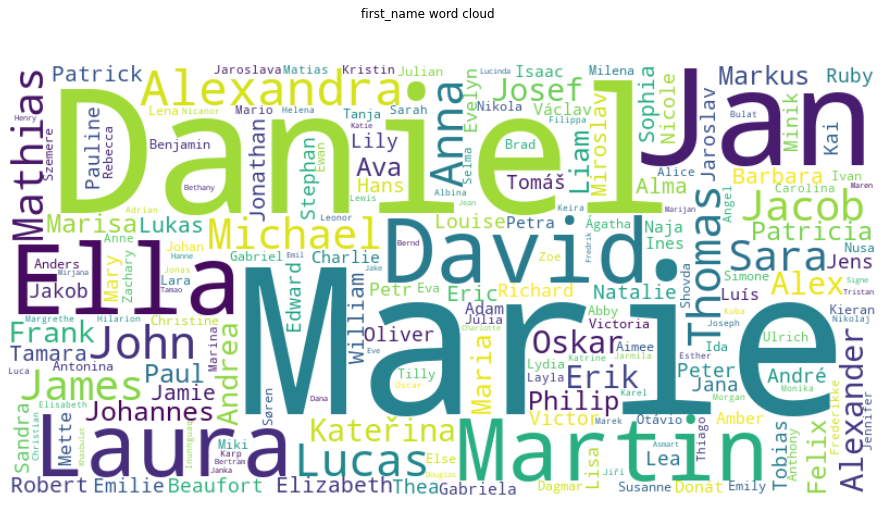

In [8]:
series_to_wordcloud(pii_df.first_name)

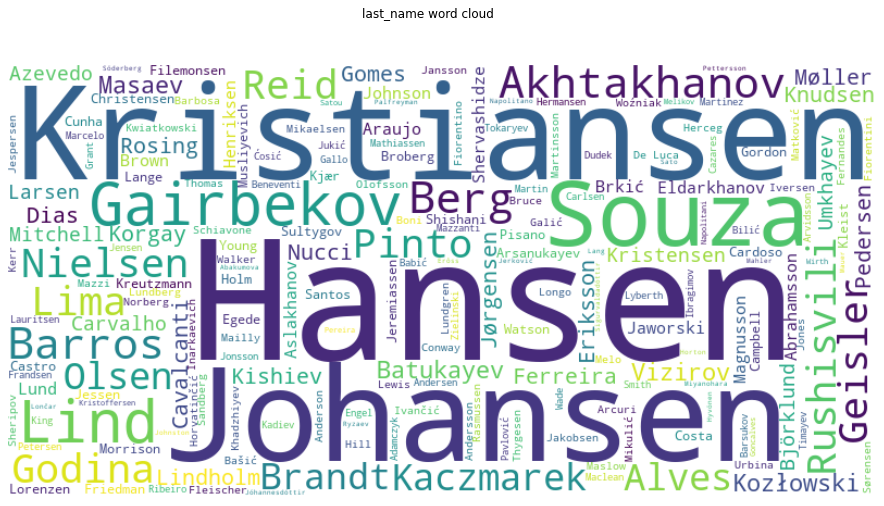

In [9]:
series_to_wordcloud(pii_df.last_name)

In [10]:
series_to_wordcloud(pii_df.country_full)

AttributeError: 'DataFrame' object has no attribute 'country_full'

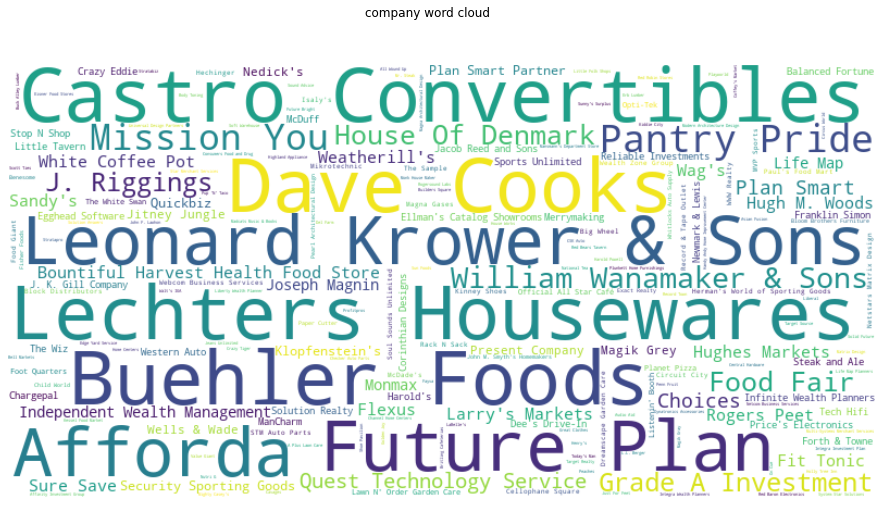

In [11]:
series_to_wordcloud(pii_df.company)

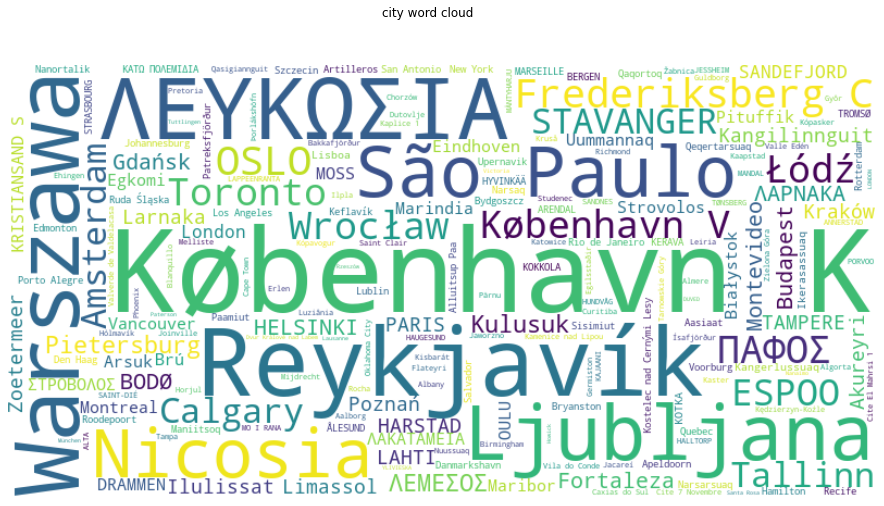

In [12]:
series_to_wordcloud(pii_df.city)

2. Evaluate different entities in the synthetic dataset after creation

In [13]:
synth = InputSample.read_dataset_json("data/synth_dataset_v2.json")

tokenizing input:   0%|          | 0/1500 [00:00<?, ?it/s]

loading model en_core_web_sm


tokenizing input: 100%|██████████| 1500/1500 [00:08<00:00, 185.74it/s]


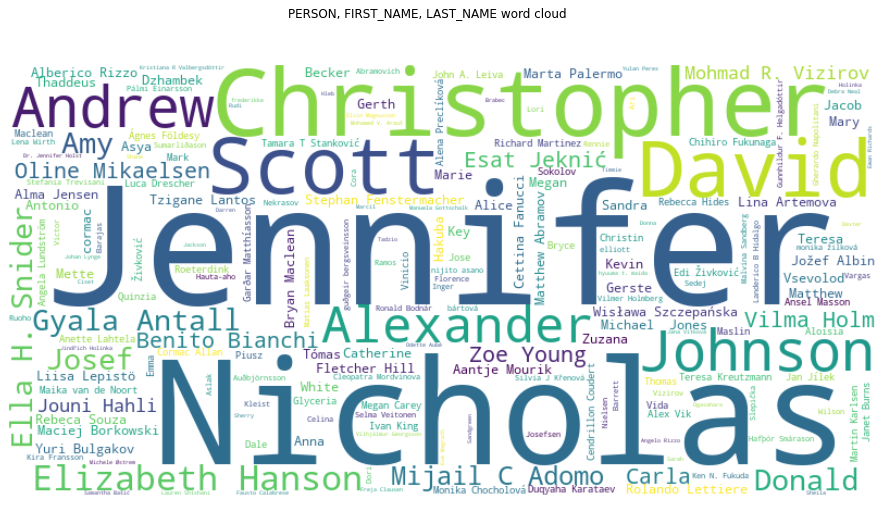

In [14]:
def get_entity_values_from_sample(sample, entity_types):
    name_entities = [
        span.entity_value for span in sample.spans if span.entity_type in entity_types
    ]
    return name_entities


names = [
    get_entity_values_from_sample(sample, ["PERSON", "FIRST_NAME", "LAST_NAME"])
    for sample in synth
]
names = [item for sublist in names for item in sublist]
series_to_wordcloud(pd.Series(names, name="PERSON, FIRST_NAME, LAST_NAME"))

In [15]:
countries = [get_entity_values_from_sample(sample, ["LOCATION"]) for sample in synth]
countries = [item for sublist in countries for item in sublist]
series_to_wordcloud(pd.Series(countries, name="LOCATION"))

/var/folders/5b/gb99mzf5405dtnqzy0wj8lvw0000gn/T/ipykernel_3681/1000799999.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series_to_wordcloud(pd.Series(countries, name="LOCATION"))


ValueError: We need at least 1 word to plot a word cloud, got 0.

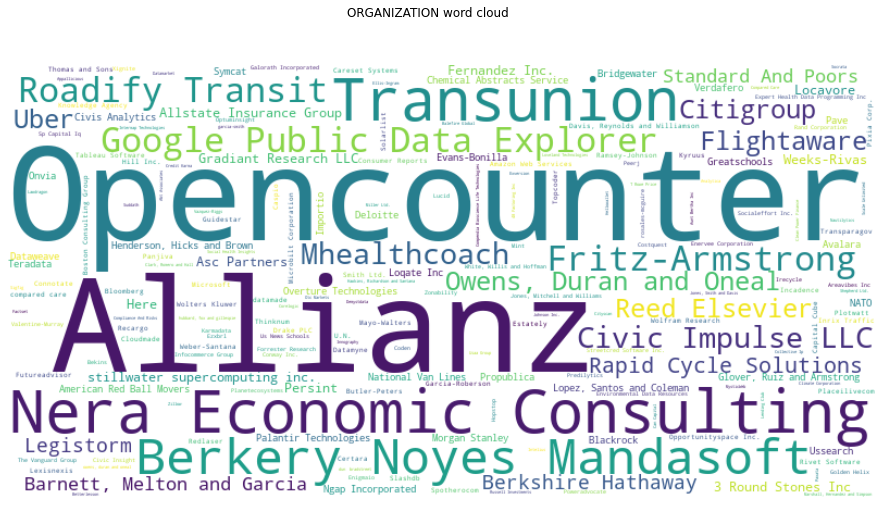

In [16]:
orgs = [get_entity_values_from_sample(sample, ["ORGANIZATION"]) for sample in synth]
orgs = [item for sublist in orgs for item in sublist]
series_to_wordcloud(pd.Series(orgs, name="ORGANIZATION"))